In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from datetime import datetime
# import matplotlib.animation as anim

from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import LinearRegression, RANSACRegressor, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

from scipy.stats import ttest_1samp, ttest_ind
from scipy import stats
from statsmodels.stats import weightstats as stests

from functools import wraps
import time

In [3]:
plt.style.use('seaborn')

In [4]:
%run CoreFunction.ipynb

In [5]:
TEST_SIZE=0.15
n_comp = 0.95

In [6]:
scaler_min_max = MinMaxScaler()
scaler_z_score = StandardScaler()

# Electricity Load Forecast 

## Multi-output Base Models

### Read Price and Normalize Data

In [7]:
load_target, load_attribute, df_data_load = read_data("total load actual",  r"data\df_data_load_ts720_120_24.csv")

In [8]:
load_atribute_train, load_atribute_test, load_target_train, load_target_test, load_attribute_col_names = scaled_data(load_target, load_attribute, TEST_SIZE, scaler_z_score)

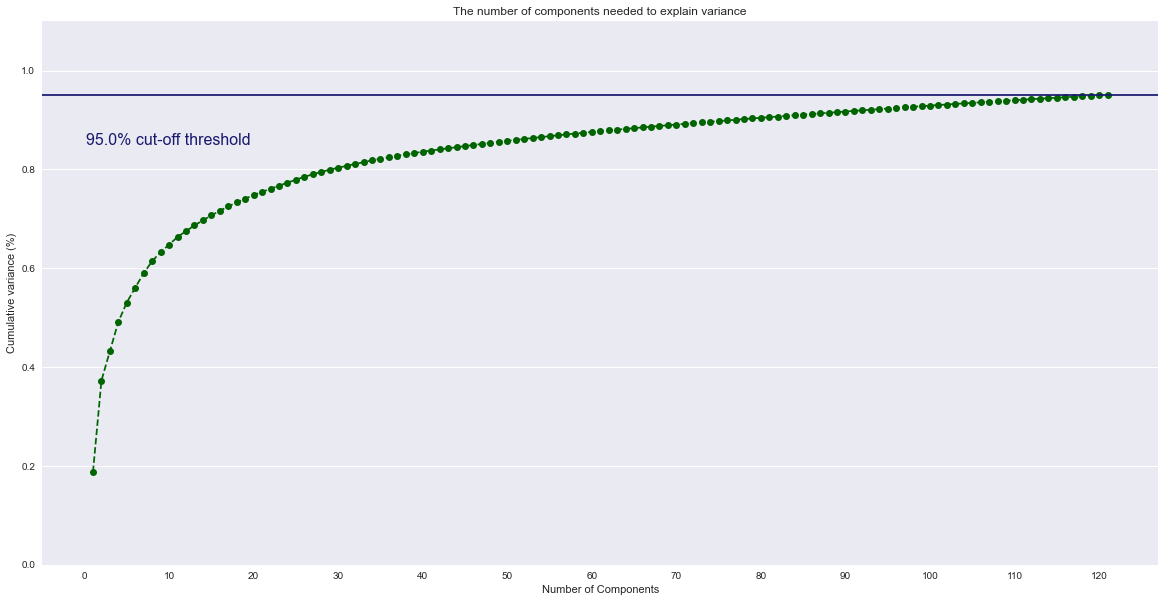

Transformed train shape: (29071, 121)
Transformed test shape: (5131, 121)
Function took 2.9543 seconds


In [9]:
most_important_features, PC_train, PC_test = PCA_feature_preprocessing(load_atribute_train, load_atribute_test, n_comp = n_comp, col_names = load_attribute.columns)

In [10]:
df_data_load.shape, load_target.shape, load_attribute.shape

((34202, 920), (34202, 120), (34202, 798))

In [11]:
load_atribute_train.shape, load_target_train.shape, load_atribute_test.shape, load_target_test.shape

((29071, 798), (29071, 120), (5131, 798), (5131, 120))

In [12]:
load_atribute_train.mean(), load_atribute_train.std()

(0.000684557477236435, 1.000741100812629)

In [13]:
load_atribute_train.min(), load_atribute_train.max()

(-13.336127913386292, 184.935123759658)

Линейната регресия е лесен и популярен подход при контролираното машинно обучение.
Може да бъде единична или множествена в зависимост от броя на независимите променливи. В зависимост от прогнозираният изход, може да бъде едноизходна и многоизходна.

В най-базовия случай линейна регресия дава възможност да анализираме влиянието на две или повече независими случайни променливи върху една зависима променлива:

$$y=β_0​+β_1​x_1​+β_2​x_2​+⋯+β_p​x_p​+ε$$

$β_1, β_2$ и т.н. се наричат регресионни коефициенти и показват връзката между y и $x_i$. 

Регресията с множество изходи e регресионен проблем, които включва прогнозиране на две или повече променливи, отопределен входен набор независимите променливи. Основно има два подхода при решаване на многоизходни регрисионни проблеми:

- __Директен мултиизход__ : от входният набор се прогнозира независимо всеки изход.
- __Верижен мултиизход__ : от входният набор се прогнозира първият изход, който служи за прогнозиране на следващият и т.н.

__Основното предположение__ на модела на линейна регресия е, че между зависимите и независимите променливи съществува  линейна връзка и независимите променливи не са свързани една с друга. В __допусканията за грешката__ на модела са:

   - Грешката на модела е нормално разпределена около средна стойност 0.
   - Хомоскедастизъм - има еднакво разсейване/вариация.
   - Няма автокорелация - остатъците в модела на линейна регресия са независимо и еднакво разпределени.
 
Голямото __предимство__ на линейната регресия се обуславя от факта, че предоставят лесно тълкуване на моделите, което е важно за академичните и надзорните структури. 

Основният __недостатък__ на линейно регрисионните модели е основното им допускане, че зависимостта между независимите и зависимите променливи е линейна. Въпреки това те са много добра отправна точка за моделиране.

Ще ползваме базовата линейна регресия като бенчмарк за нашите модели. Първоначално ще изградим линеен регресионен модел върху всички данни.

### Multi-Output Linear Regression

In [ ]:
# https://blog.quantinsti.com/linear-regression-assumptions-limitations/
# https://stackoverflow.com/questions/55841663/do-we-only-use-trainig-data-whe-using-cross-val-score


# - Score Results:
# - Mean squared error: 206707.53
# - Root mean squared error: 454.65
# - Mean absolute error: 316.89
# - Coefficient of determination: 0.9901
# - Predicted mean: 28712.130 (4594.035)
# - Actual mean: 28698.281 (4575.764)

LinearRegression() на sklearn поддържа вграден Multi-Output изход базиран на директният подход.

In [14]:
_, _, _,_ = cv_score(LinearRegression(), load_atribute_train, load_target_train)

Cross validated Mean Squared Error: 7240163.112 (84842.998)
Cross validated Root Mean Squared Error: 2690.258 (15.760)
Cross validated Mean Absolute Error: 2029.063 (11.941)
Cross validated Coefficient of Determination: 0.651 (0.004)
Function took 309.6503 seconds


In [15]:
load_linear_regression = LinearRegression().fit(load_atribute_train, load_target_train)

In [16]:
save_model(load_linear_regression, "#load_linear_regression.sav")

In [17]:
load_linear_regression = load_model("#load_linear_regression.sav")

In [18]:
load_prediction = load_linear_regression.predict(load_atribute_test)

In [19]:
_, _, _ = evaluation_report(load_linear_regression, load_atribute_train, load_target_train)

Score Results:
Mean squared error: 6826651.74
Root mean squared error: 2612.60
Mean absolute error: 1969.70
Coefficient of determination: 0.6707
Predicted mean: 28672.204 (3729.162)


In [20]:
_, _, _  = evaluation_report(load_linear_regression, load_atribute_test, load_target_test)

Score Results:
Mean squared error: 7173968.58
Root mean squared error: 2677.90
Mean absolute error: 2019.77
Coefficient of determination: 0.6537
Predicted mean: 28652.501 (3718.959)


Посочените показатели за изчисляване на грешката по-горе са средни от оценките за всички 120 регресии. На пръв поглед оценките върху тренировъчните и тестовите данни са близки и изглежда, че модела генерализира добре. Но тъй като работим с разпределения, обаче ще проверим с тестове на хипотези, дали между двете оценки има статистически значима разлика.

Както е видно по-долу от графиките и тестовете, твърдението, че двете оценки са близки не може да бъде прието.


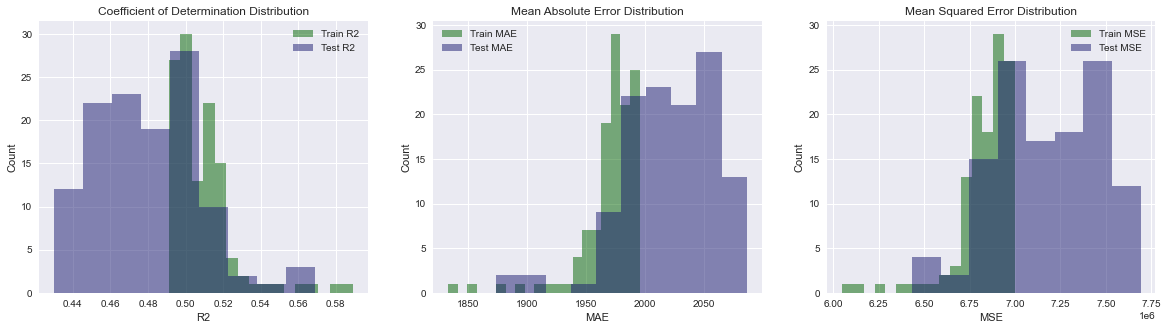

In [21]:
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = generate_score_distributions(load_linear_regression, load_atribute_train, load_target_train, load_atribute_test, load_target_test)

Тестваме дали между извадките за посочените три вида оценители има статистическа значима разлика. Двата типа тестове имат следните хипотези:<br>

__Two Sample z-test__ uses the following null and alternative hypotheses:<br>
- $H_0$: μ1 = μ2 (the two population means are equal)<br>
- $H_A$: μ1 ≠ μ2 (the two population means are not equal)<br>

__Two Sample t-test__ uses the following null and alternative hypotheses:<br>
- $H_0$: µ1 = µ2 (the two population means are equal)<br>
- $H_A$: µ1 ≠µ2 (the two population means are not equal)<br>

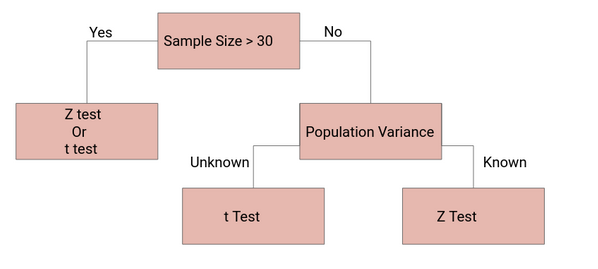

In [22]:
pv_r2_ttest = get_ttest_2samples(r2_train, r2_test)
pv_mae_ttest = get_ttest_2samples(mae_train, mae_test)
pv_mse_ttest = get_ttest_2samples(mse_train, mse_test)

p-value: 4.6975954937559035e-18
we are rejecting null hypothesis
p-value: 3.0281436821909716e-24
we are rejecting null hypothesis
p-value: 2.74911849347193e-25
we are rejecting null hypothesis


In [23]:
pv_r2_ztest = get_ztest_2samples(r2_train, r2_test)
pv_mae_ztest = get_ztest_2samples(mae_train, mae_test)
pv_mse_ztest = get_ztest_2samples(mse_train, mse_test)

p-value: 5.4045416739945734e-21
reject null hypothesis
p-value: 5.2290464412480556e-30
reject null hypothesis
p-value: 1.2390891645346647e-31
reject null hypothesis


In [ ]:
# df_coef=pd.DataFrame()
# df_coef["Feature Name"] = load_attribute_col_names
# for i in range (0, 120):
#     df_coef[f"Target_{i+1}"] = load_linear_regression.coef_[i]
# df_coef    

In [ ]:
# df_coef.describe().T
# df_coef.describe().T["max"].max() # ---> Target_2  ---> 7.279175
# df_coef.describe().T["min"].min()  # ----> ---> Target_3 ----> -1.191232

In [ ]:
# df_coef[df_coef["Target_2"]>7]

In [ ]:
# sorted(load_linear_regression.coef_[1], reverse=True)

In [ ]:
# len(load_linear_regression.intercept_), load_linear_regression.intercept_

Кода по-долу визуализира някой основни характеристики на 120-те изхода на линейната регресия. Прави тест за нормалност на остатъците за избрана изходна регресия, както и визуализира съпоставка между прогнозираната и реалната цена за избрани точкови наблюдения. 
- __e_minus_o__ - може да избира от start_index=0 до stop_index=120 - колкото е броя на изходите/единичните регресии<br>
- __get_ttest и get_ztest__ работят с конкретен индекс от 0 до 120 - колкото е броя на изходите/единичните регресии<br>
- __plot_actual_vs_prediction__ - избира start_inx = 0 end_inx = 5131 броя на наблюденията в тестовия сет<br>
- __plot_feature_vs_residuals__ - избира start_inx = 0 end_inx = count(feature) броя на features в тестовия сет. Ако се подаде само име на feature ще извади само неговата графика.  Когато работим с пълният сет данни броя feature е в променливата load_attribute_col_names. При работа с редуцирани данни имената на колоните се генерират автоматично.<br>



<span style="color:red"> *Тези упътвания важат за всички по-натъшни модели.<span>
    
Забелязва се определена нестабилност при прогнозирането на по-ниските генерации.Тестовете показват, че не може да се отхвърли предположението, че Residuals имат нормално разпределение. 
    
Разпределението на residuals е леко ляво изтеглено. Тестовете за нормалност минават. Таргет променливата има подчертан бимодален характер.

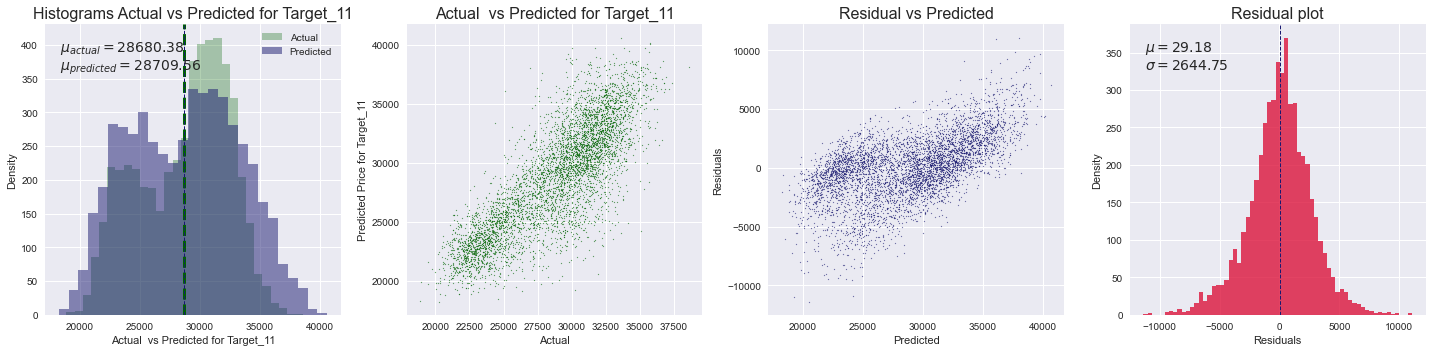

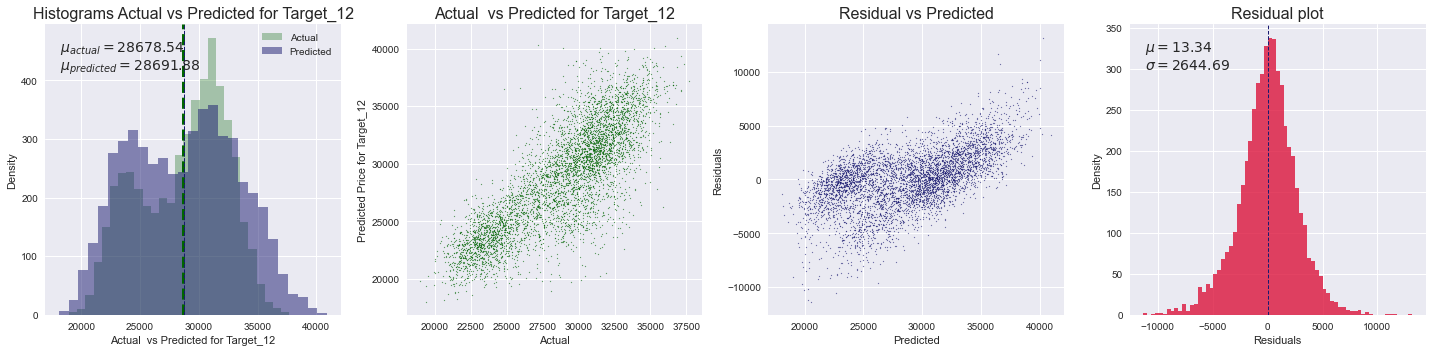

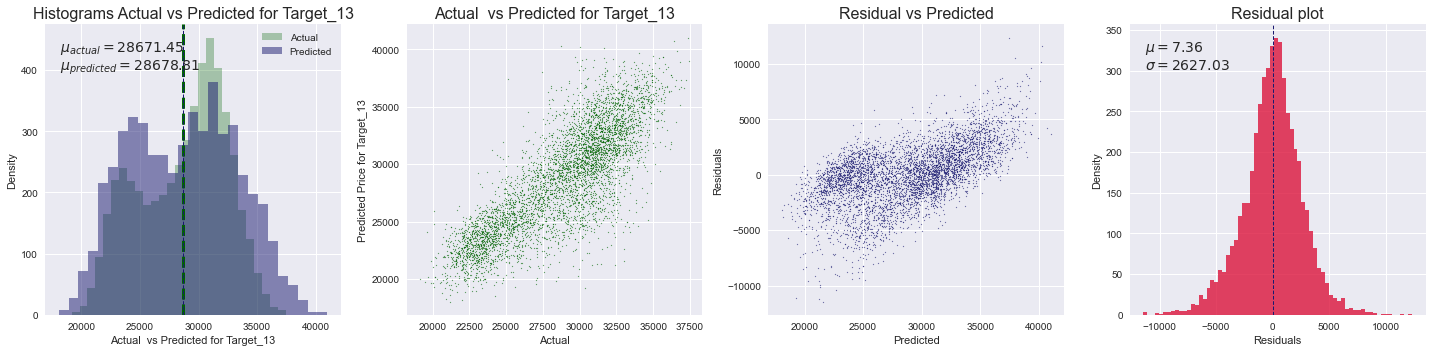

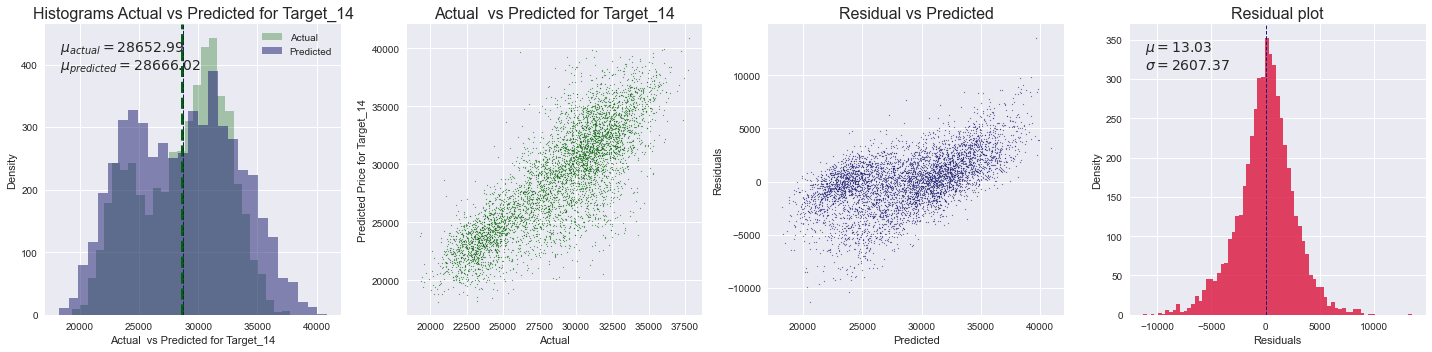

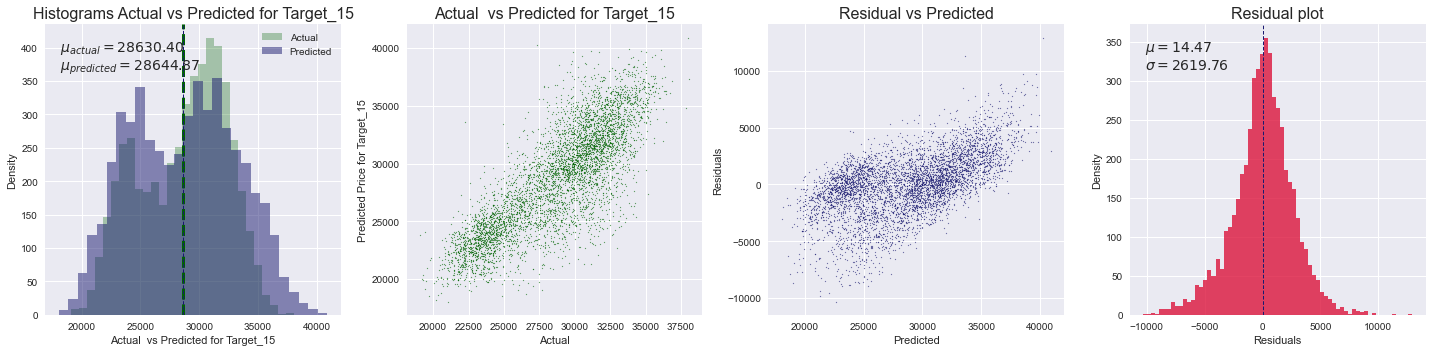

In [24]:
e_minus_o = get_and_plot_data(load_prediction, load_target_test, start_index=10, stop_index=15)
# beteen 0 and 120 ----> count of targets

In [25]:
print(get_ttest (load_prediction, load_target_test, idx=10))

p-value: 0.42945194984349966
we are accepting null hypothesis


In [26]:
print(get_ztest (load_prediction, load_target_test, idx=10))

p-value: 0.42941542533750743
accept null hypothesis


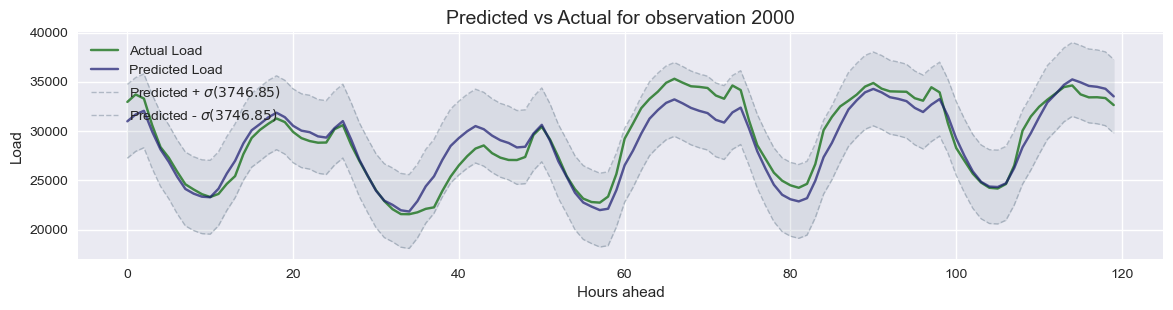

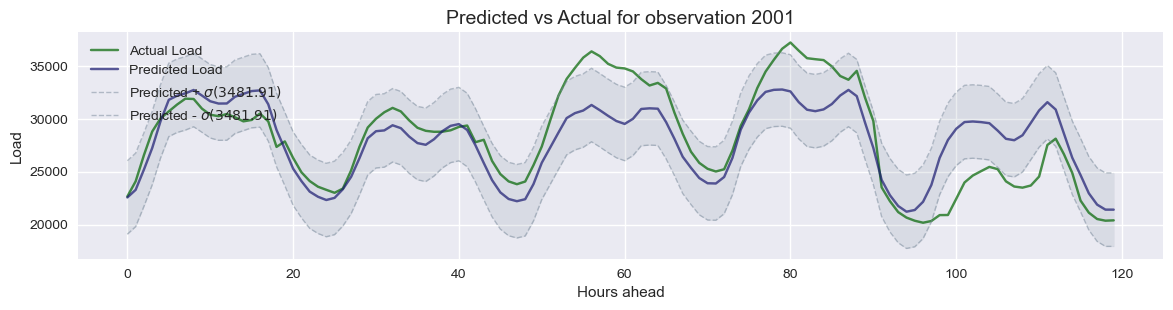

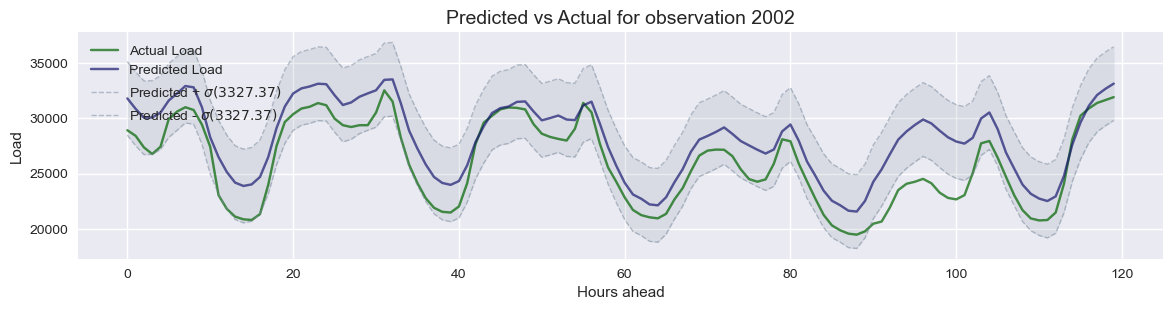

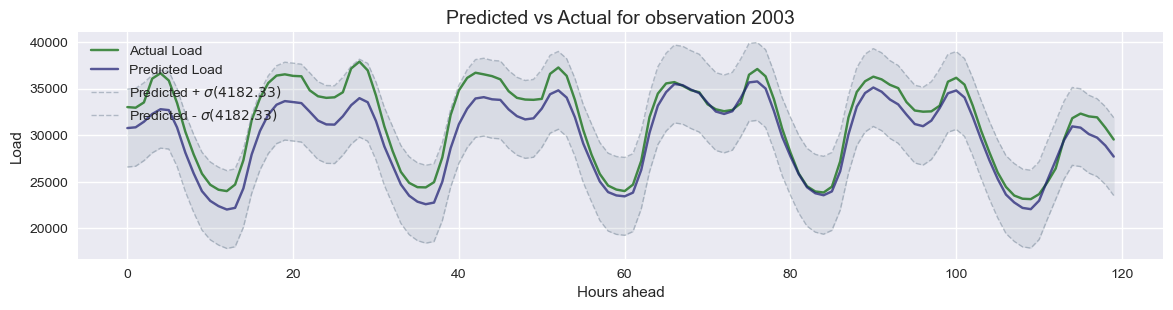

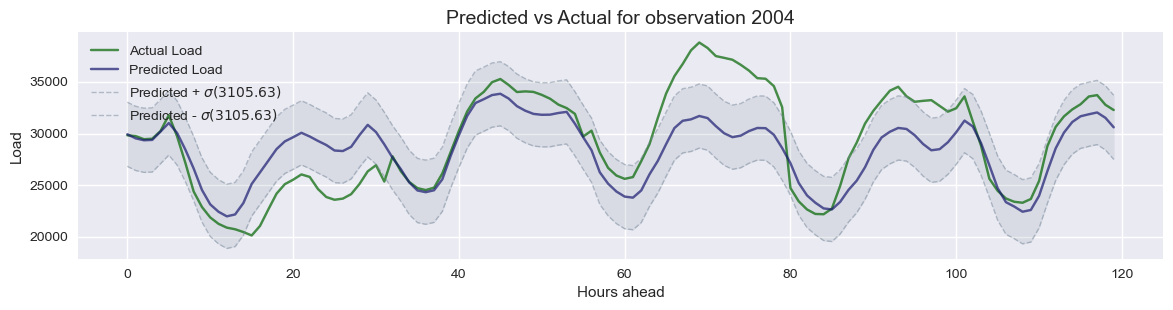

In [27]:
plot_actual_vs_prediction(load_prediction, load_target_test, variable_name = 'Load', start_inx = 2000, end_inx = 2005)
# beteen 0 and 5131 ----> count of observations in test_dataset

Функцията plot_feature_vs_residuals() визуализира вида на feature vs residuals:

- (start_index, stop_index) - интервала се определя от броя на features --> len(load_attribute_col_names); 
- Ако се подаде само име на feature ще извади само неговата графика.
- load_attribute_col_names.to_list() - имената на колоните, с които работи са тук. Примерно: col_name = 'price actual'
- target_indx показва за кой изход искаме да видим разпределението - възможните стойности са в интервала [0, 119], колкото са изходите на регресията.

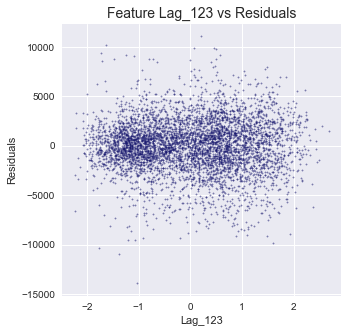

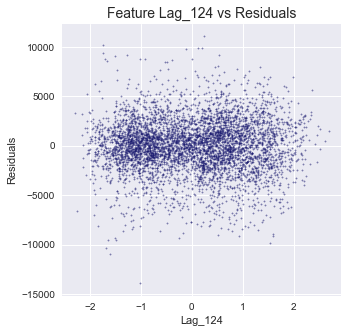

In [28]:
plot_feature_vs_residuals(load_atribute_test, load_attribute_col_names, 
                          load_prediction, load_target_test, start_index=200, stop_index=202, 
                          target_indx = 119, col_name = None) 

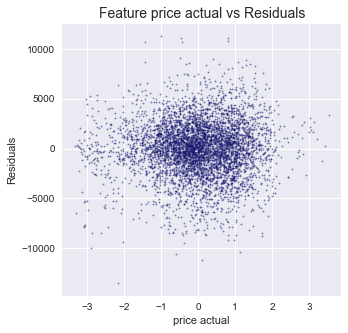

In [29]:
plot_feature_vs_residuals(load_atribute_test, load_attribute_col_names, 
                          load_prediction, load_target_test, start_index=155, stop_index=157, 
                          target_indx = 50, col_name = 'price actual') 

Наложен върху всички данни, LinearRegression() е относително бърз. Ще пробваме доколко биха се променили резултатите при редукция на пространството. 

### Linear Regression with Reduce feature

In [30]:
load_linear_regression_pca = LinearRegression().fit(PC_train, load_target_train)

In [30]:
save_model(load_linear_regression_pca, "#load_linear_regression_pca.sav")

In [30]:
load_linear_regression_pca= load_model("#load_linear_regression_pca.sav")

In [22]:
_, _, _, _ = cv_score(LinearRegression(), PC_train, load_target_train)
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42) изглежда нестабилен този резултат  - доста разсеяни метрики.

Cross validated Mean Squared Error: 23822485.710 (34850180.246)
Cross validated Root Mean Squared Error: 3732.519 (2116.919)
Cross validated Mean Absolute Error: 2066.915 (53.011)
Cross validated Coefficient of Determination: 1.189 (1.200)
Function took 38.2130 seconds


Крос валидацията има ненормална оценка - доста разсеяни метрики и коефициента на определеност надхвърля 1 със стандартно отклонение 1,20!!! 

Cross validated Coefficient of Determination: 1.189 (1.200)!!!!! WOW (функцията ми връща абсолютната стойност на Coefficient of Determination) - Да проверя дали не е отрицателен, което е обяснимо. r2 = np.absolute(r2)

In [32]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
cross_val_score(LinearRegression(), PC_train, load_target_train, scoring='r2', cv=cv, n_jobs=-1)

array([ 0.64338857,  0.65189413,  0.65116335,  0.65396813,  0.6486323 ,
       -4.97303417,  0.64469128,  0.64045093, -2.18104098,  0.65443148,
        0.64548543, -4.3502574 ,  0.64846572,  0.64981322,  0.65007033,
        0.64956944,  0.64170458,  0.65066314,  0.65519986, -2.15110881,
        0.64687164,  0.6498353 ,  0.64570985,  0.64074121,  0.65262557,
        0.64878993,  0.64695189,  0.65257592, -4.1355209 , -2.31779578])

In [33]:
cross_val_score(LinearRegression(), PC_train, load_target_train, scoring='r2', cv=cv, n_jobs=-1).mean()
# не му стигат данните за крос валидация или модела е много слаб

-0.15150216101009745

In [41]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cross_val_score(LinearRegression(), PC_train, load_target_train, scoring='r2', cv=cv, n_jobs=-1).mean()
# модела е много слаб

-0.19110268741522204

In [31]:
_, _, r2 = evaluation_report(load_linear_regression_pca, PC_train, load_target_train)

Score Results:
Mean squared error: 7222351.32
Root mean squared error: 2687.38
Mean absolute error: 2032.15
Coefficient of determination: 0.6517
Predicted mean: 28672.204 (3675.725)


In [32]:
_, _, r2 = evaluation_report(load_linear_regression_pca, PC_test, load_target_test)

Score Results:
Mean squared error: 7208008.95
Root mean squared error: 2684.43
Mean absolute error: 2031.87
Coefficient of determination: 0.6520
Predicted mean: 28648.225 (3668.109)


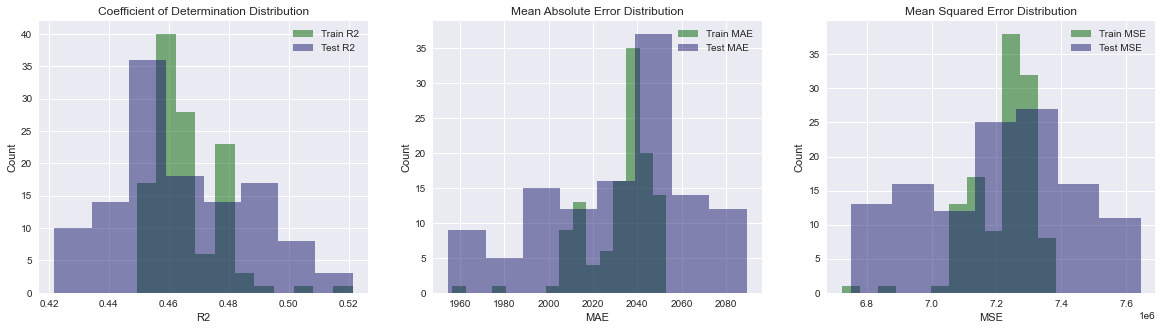

In [33]:
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = generate_score_distributions(load_linear_regression_pca, PC_train, load_target_train, PC_test, load_target_test)

In [34]:
pv_r2_ttest = get_ttest_2samples(r2_train, r2_test)
pv_mae_ttest = get_ttest_2samples(mae_train, mae_test)
pv_mse_ttest = get_ttest_2samples(mse_train, mse_test)

p-value: 0.5518513746236424
fail to reject the null hypothesis
p-value: 0.9321916475678995
fail to reject the null hypothesis
p-value: 0.5306888350700554
fail to reject the null hypothesis


In [35]:
pv_r2_ztest = get_ztest_2samples(r2_train, r2_test)
pv_mae_ztest = get_ztest_2samples(mae_train, mae_test)
pv_mse_ztest = get_ztest_2samples(mse_train, mse_test)

p-value: 0.5512851710312956
fail to reject the null hypothesis
p-value: 0.9321200393036136
fail to reject the null hypothesis
p-value: 0.530086855340136
fail to reject the null hypothesis


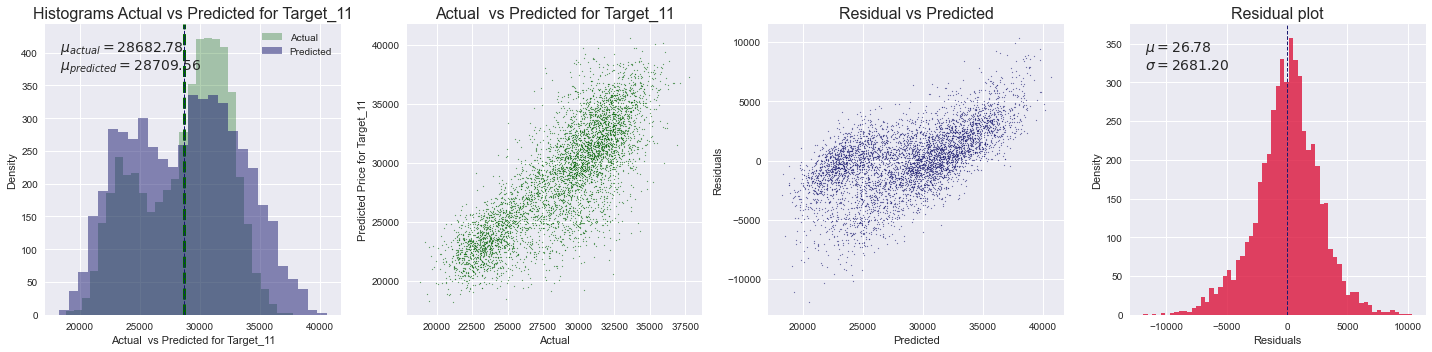

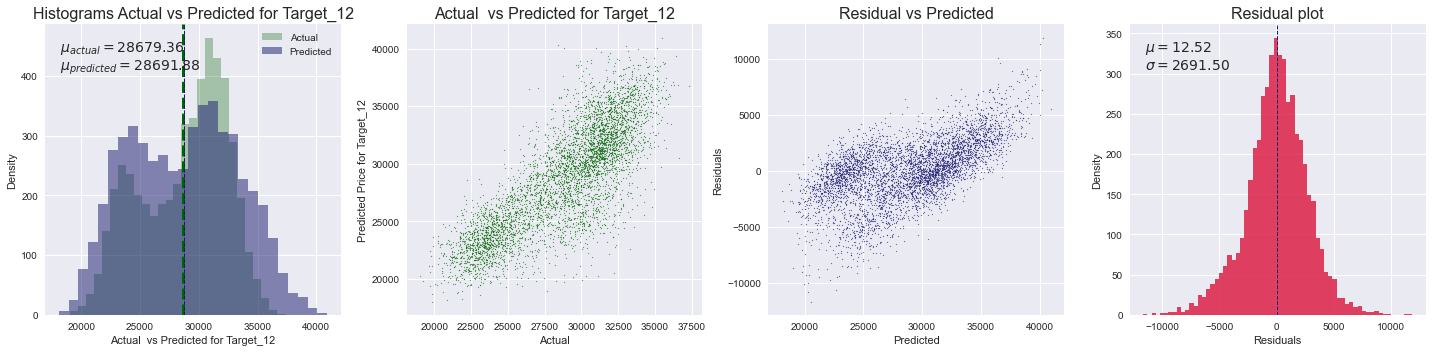

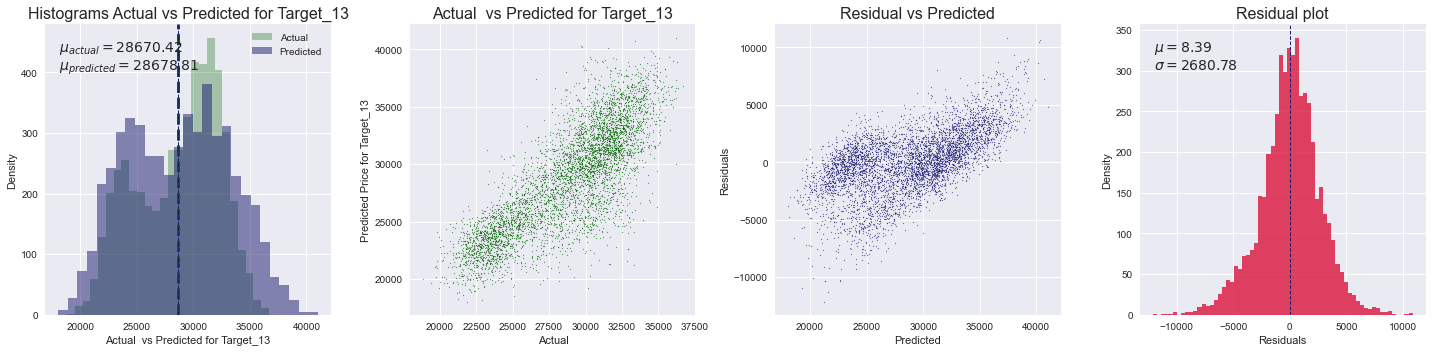

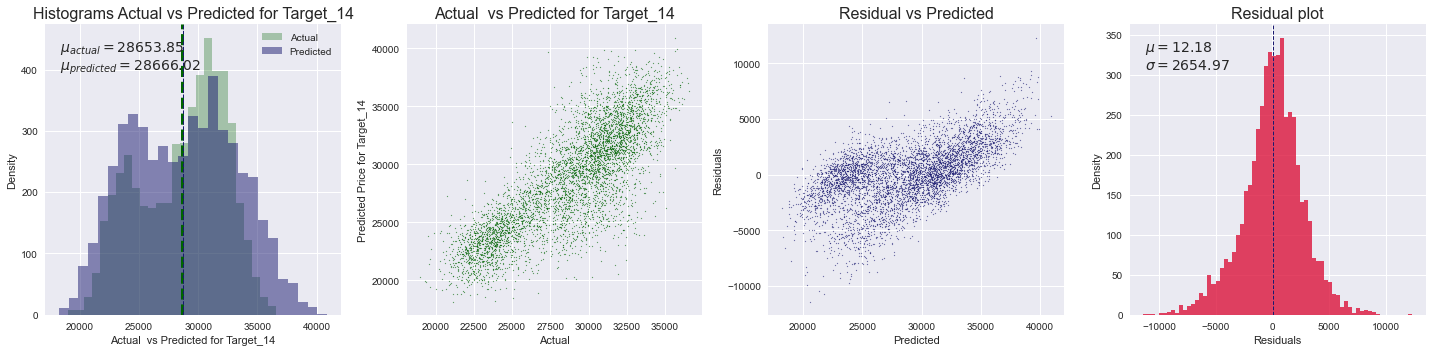

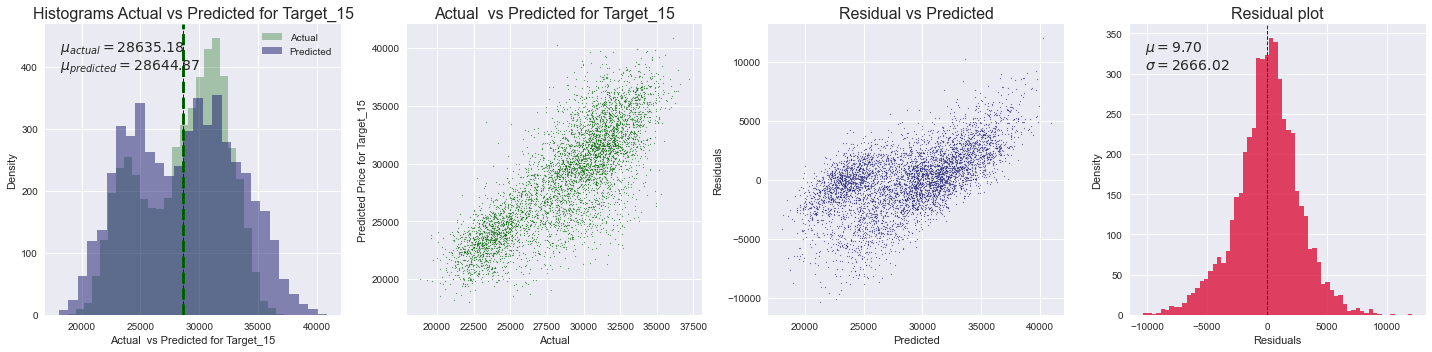

In [36]:
load_prediction_pca = load_linear_regression_pca.predict(PC_test)
e_minus_o = get_and_plot_data(load_prediction_pca, load_target_test, start_index=10, stop_index=15)

In [37]:
print(get_ttest (load_prediction_pca, load_target_test, idx=10))

p-value: 0.47437699349411655
we are accepting null hypothesis


In [38]:
print(get_ztest (load_prediction_pca, load_target_test, idx=10))

p-value: 0.47434443430900486
accept null hypothesis


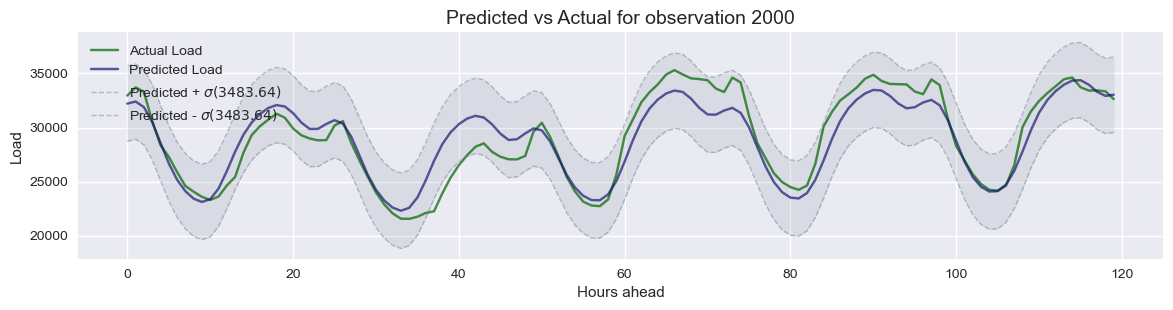

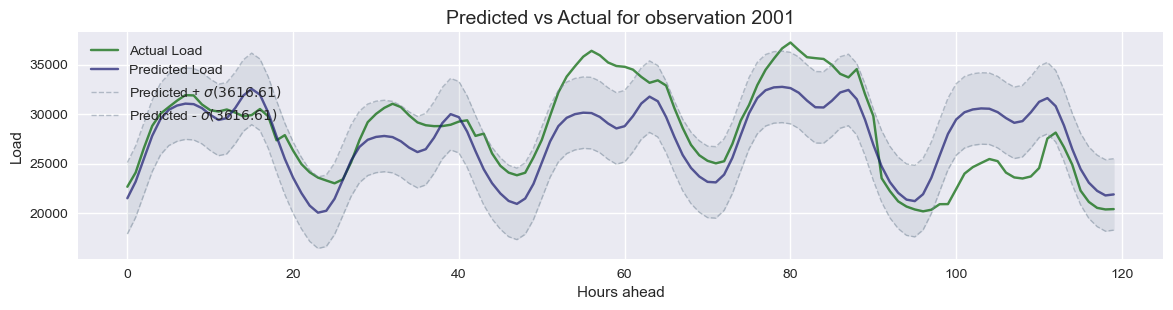

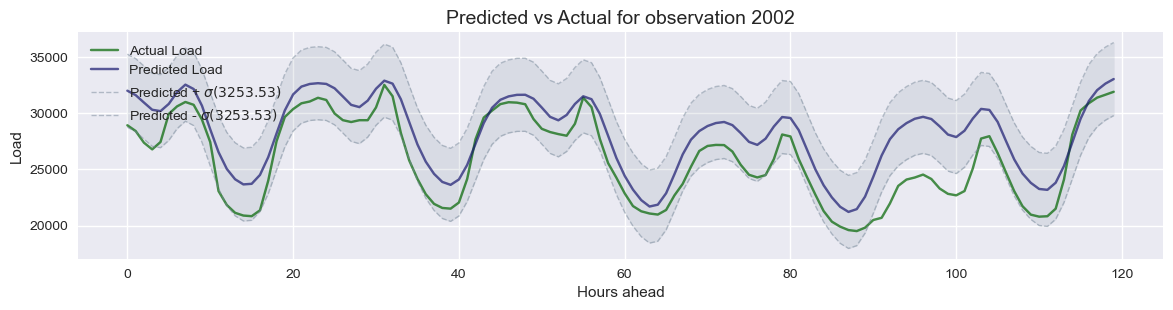

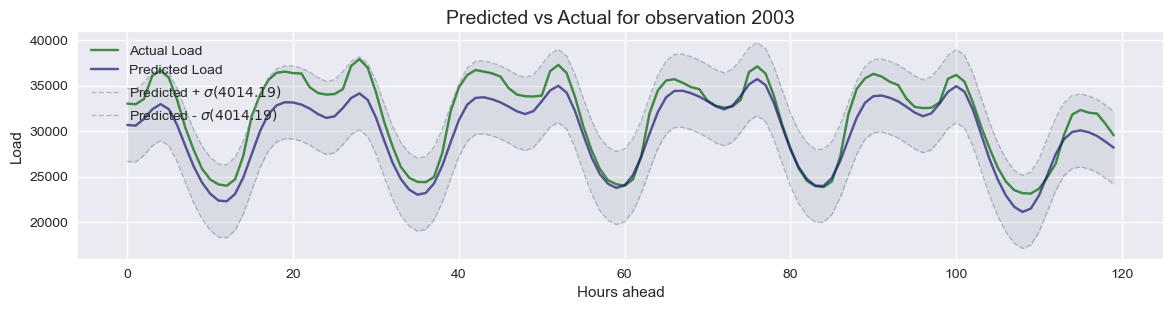

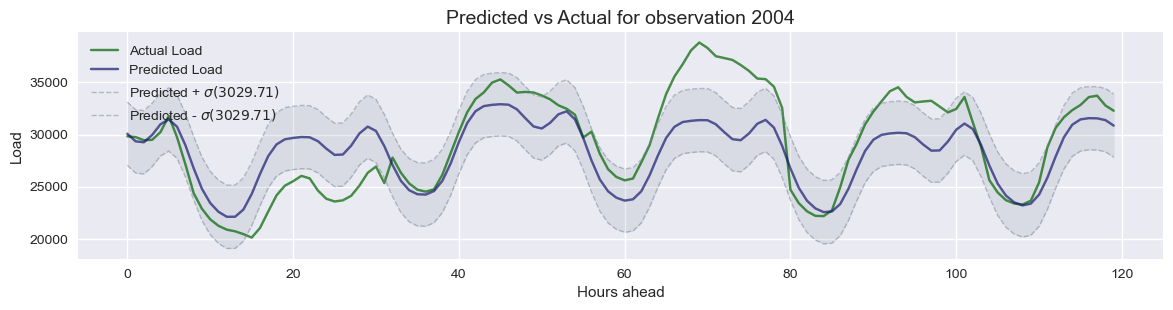

In [39]:
plot_actual_vs_prediction(load_prediction_pca, load_target_test, variable_name = 'Load', start_inx = 2000, end_inx = 2005)
# beteen 0 and 5131 ----> count of observations in test_dataset

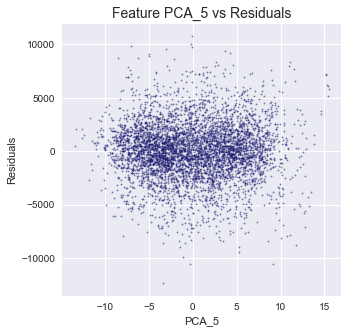

In [40]:
plot_feature_vs_residuals_PCA(PC_test, load_prediction_pca, load_target_test, 
                              start_index=5, stop_index=6, target_indx = 1, col_name = None) 

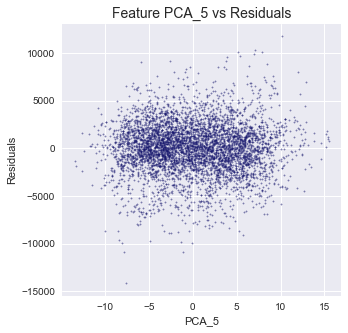

In [41]:
plot_feature_vs_residuals_PCA(PC_test, load_prediction_pca, load_target_test, 
                              start_index=45, stop_index=52, target_indx = 119, col_name = 'PCA_5') 


Като цяло резултатите, които ни дава Ordinary LinearRegression не са ниски. Като се има предвид, че искаме да прогнозираме генерацията на електрическа енергия, отдалечена на 144 периода напред във времето, това е в известна степен очакван резултат. Не се забелязва особен overfitting (тренировъчните и тестовите данни се представят по много сходен начин), но модела определено не описва добре данните (метриките са доста ниски). Има и подчертано бимодално поведение в таргетната променлива, което на по-късен етап ще се опитаме да моделираме по-прецизно. На фона на тази оценка не можем да очакваме значително по различни резултати, ако приложим познатите методи за регуляризация - Ridge и Lasso. По-специално, регулирането се прилага, за да се избегне пренастройване(overfitting) на данните. Идеята на регуляризацията е да се намали зависимостта на модела от данните, чрез ограничаване важността на отделните features.

### Multi-Output Ridge Regression

Въпреки, че не очакваме особени резултати от прилагане на регуляризация, нека проследим поведението на алгоритъма при налагане на ограничения от типа Ridge (L2 regularization). Lasso (L1 regularization) е екстремно бавен и тук няма да тестваме неговото поведение върху данните. 

При Ridge регресията добавяме наказателен член в cost function, който е пропорционален на квадрата на коефициента. Този наказателен член ограничава важността на входната променлива, но не я нулира.

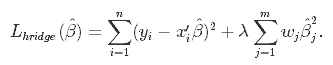

При Lasso, в наказателния член ползваме абсолютната стойност на коефициента. В някой от случаите този тип регуляризация може да нулира теглото на входните променливи и по този начин има ефект да свива измеренията.

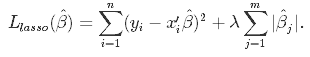

𝜆 – параметър за регулиране
𝜆>0, колкото е по-голямо ⇒ по-силно регулиране

In [42]:
# Първоначално ще опитаме да визуализираме зависимостта на 𝜆 от теглата на регресията. 
# За различните Targets ползваме промеливата idx в диапазона [0, 120].

@timeit
def plot_alphas_result(X, Y, idx=0):
    clf = Ridge()
    coefs = []
    alphas = np.logspace(-6, 9, 10)

    for a in alphas:
        clf.set_params(alpha=a)
        clf.fit(X, Y)
        coefs.append(clf.coef_[idx])

    plt.figure(figsize=(40, 15))
    plt.subplot(121)
    ax = plt.gca()
    ax.plot(alphas, coefs, color='darkgreen', linewidth=0.2 )
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Ridge coefficients as a function of the regularization Alpha parameter')
    plt.axis('tight')

#     plt.annotate('Lasso is done at that point \nand all weights would be shrinked to zero', 
#     xy=(0.1, -0.6), xytext=(0.1, -0.4), arrowprops=dict(facecolor='midnightblue'), color='midnightblue', fontsize=16)
#     plt.grid(color='midnightblue', linestyle='dotted')
    plt.show()

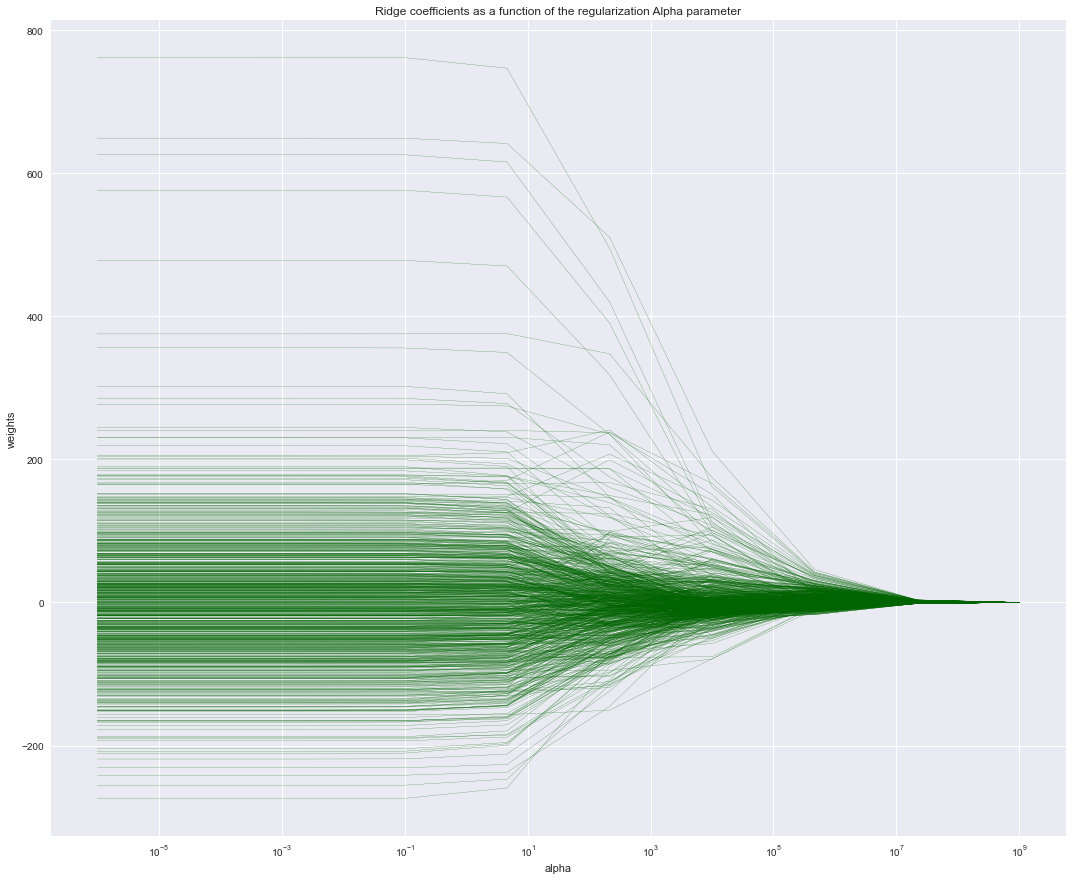

Function took 6.7004 seconds


In [72]:
plot_alphas_result(load_atribute_train, load_target_train, idx = 101)
# Около 10^3 е оптимално да се тества.

In [43]:
ridge = Ridge()

In [73]:
tuned_params = {
    "alpha": [1000, 2000, 2500, 3000] #tested with [0.001, 0.01, 1, 10, 100, 1000, 10000, 100000],
}
cv = 3
load_ridge = get_grid_search(ridge, tuned_params, cv, load_atribute_train, load_target_train)
# Тая ламбда много шантава!!! Да я проверя

Ridge(alpha=2000)
Function took 9.8264 seconds


In [44]:
save_model(load_ridge, "#load_ridge.sav")

In [45]:
load_ridge = load_model("#load_ridge.sav")
load_ridge = load_ridge.best_estimator_

In [46]:
_, _, _, _ = cv_score(ridge, load_atribute_train, load_target_train)

Cross validated Mean Squared Error: 7237562.330 (84756.900)
Cross validated Root Mean Squared Error: 2689.775 (15.747)
Cross validated Mean Absolute Error: 2028.685 (11.931)
Cross validated Coefficient of Determination: 0.651 (0.004)
Function took 65.3693 seconds


In [47]:
_, _, _ = evaluation_report(load_ridge, load_atribute_train, load_target_train)

Score Results:
Mean squared error: 6884107.81
Root mean squared error: 2623.60
Mean absolute error: 1978.65
Coefficient of determination: 0.6680
Predicted mean: 28672.204 (3692.242)


In [48]:
_, _, _ = evaluation_report(load_ridge, load_atribute_test, load_target_test)

Score Results:
Mean squared error: 6967325.15
Root mean squared error: 2639.08
Mean absolute error: 1991.61
Coefficient of determination: 0.6637
Predicted mean: 28652.074 (3680.862)


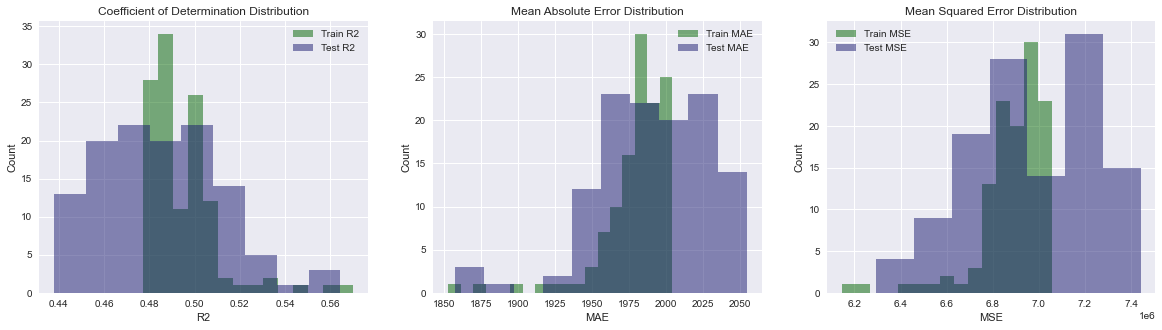

In [49]:
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = generate_score_distributions(load_ridge, load_atribute_train, load_target_train, load_atribute_test, load_target_test)

In [50]:
pv_r2_ttest = get_ttest_2samples(r2_train, r2_test)
pv_mae_ttest = get_ttest_2samples(mae_train, mae_test)
pv_mse_ttest = get_ttest_2samples(mse_train, mse_test)

p-value: 0.0007025021168340282
we are rejecting null hypothesis
p-value: 0.0020570185999759893
we are rejecting null hypothesis
p-value: 0.0031483364773608885
we are rejecting null hypothesis


In [51]:
pv_r2_ztest = get_ztest_2samples(r2_train, r2_test)
pv_mae_ztest = get_ztest_2samples(mae_train, mae_test)
pv_mse_ztest = get_ztest_2samples(mse_train, mse_test)

p-value: 0.0005957015498641863
reject null hypothesis
p-value: 0.0018319501468811203
reject null hypothesis
p-value: 0.0028515455727068507
reject null hypothesis


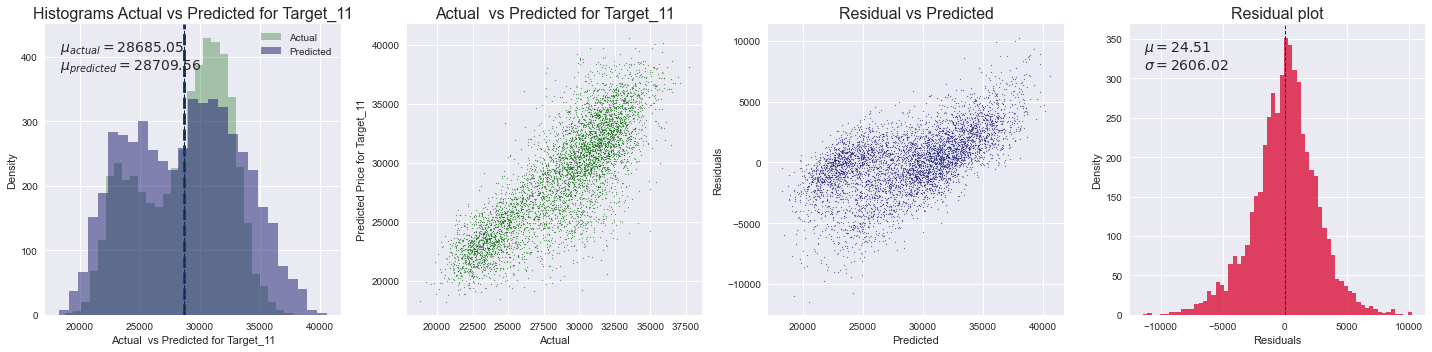

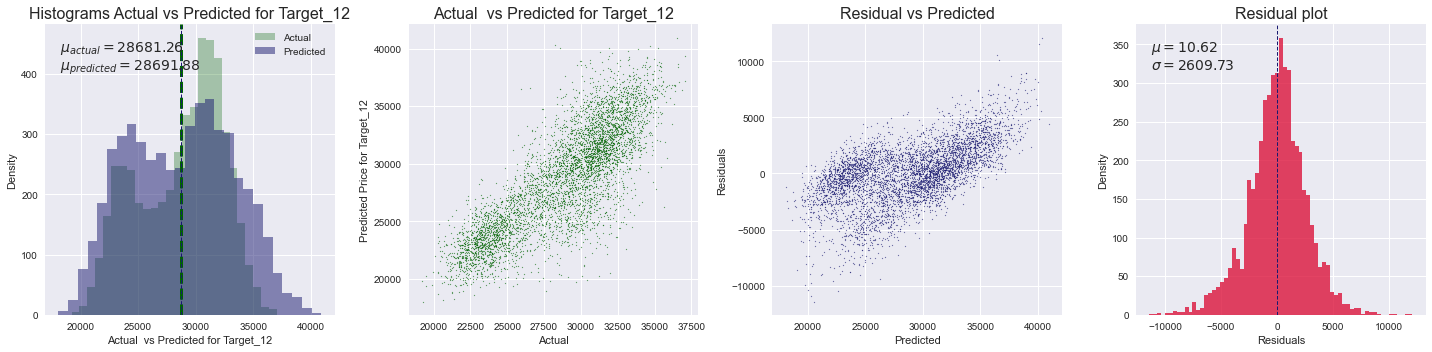

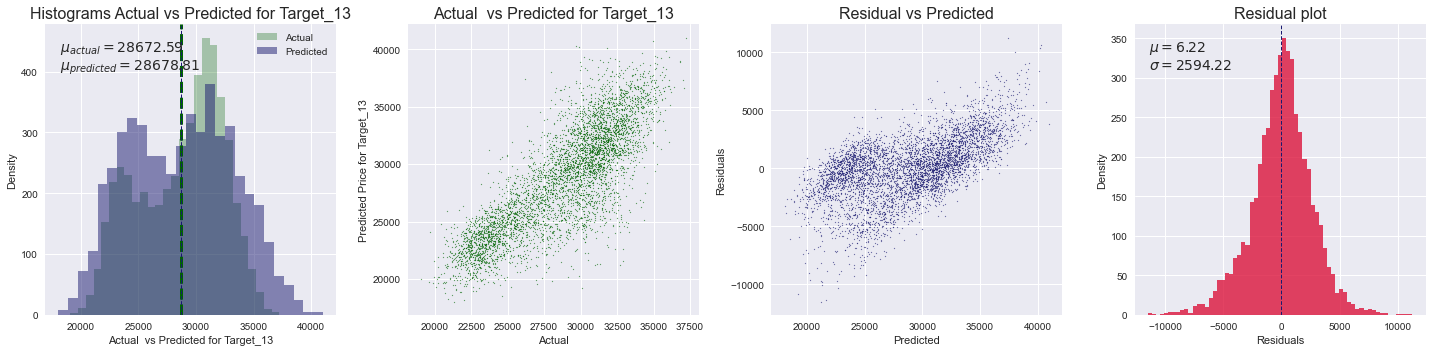

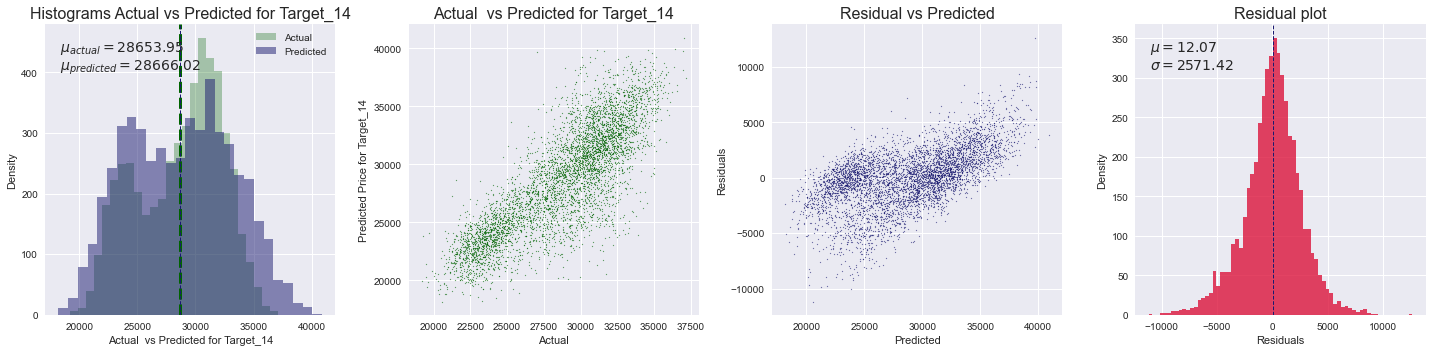

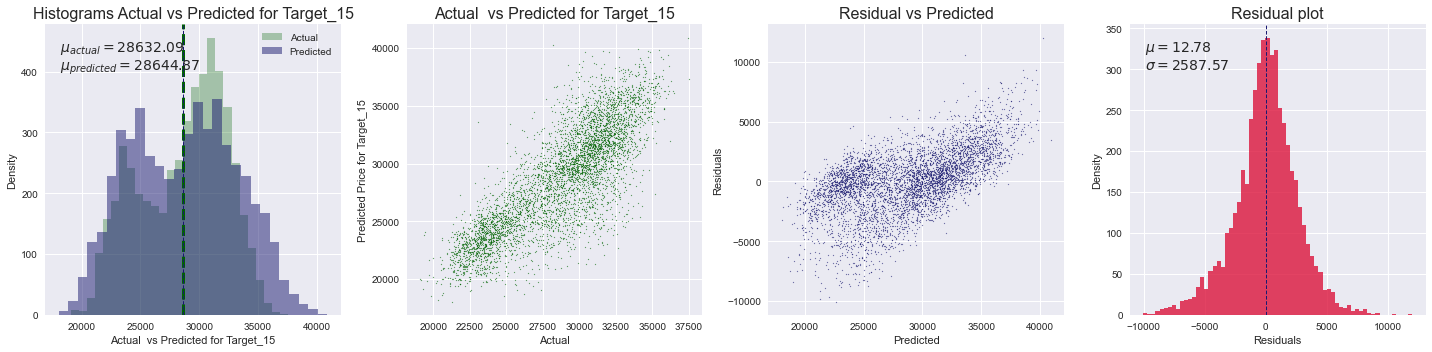

In [52]:
load_prediction_ridge = load_ridge.predict(load_atribute_test)
e_minus_o = get_and_plot_data(load_prediction_ridge, load_target_test, start_index=10, stop_index=15)

In [53]:
print(get_ttest (load_prediction_ridge, load_target_test, idx=10))

p-value: 0.5005609551942596
we are accepting null hypothesis


In [54]:
print(get_ztest (load_prediction_ridge, load_target_test, idx=10))

p-value: 0.5005306058807171
accept null hypothesis


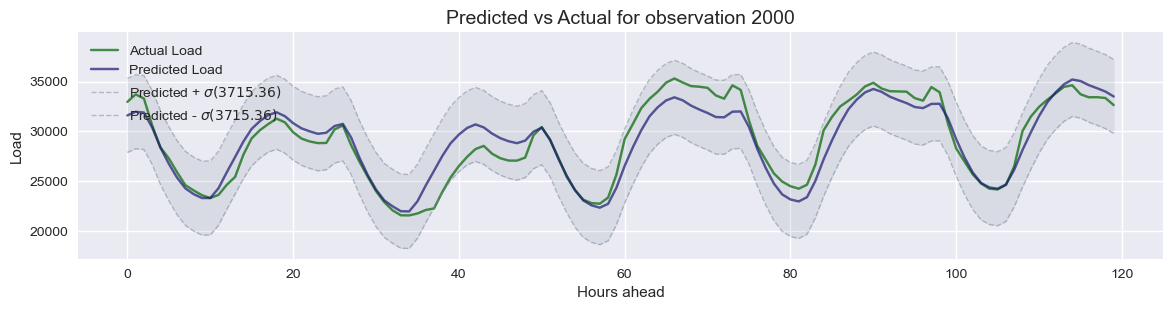

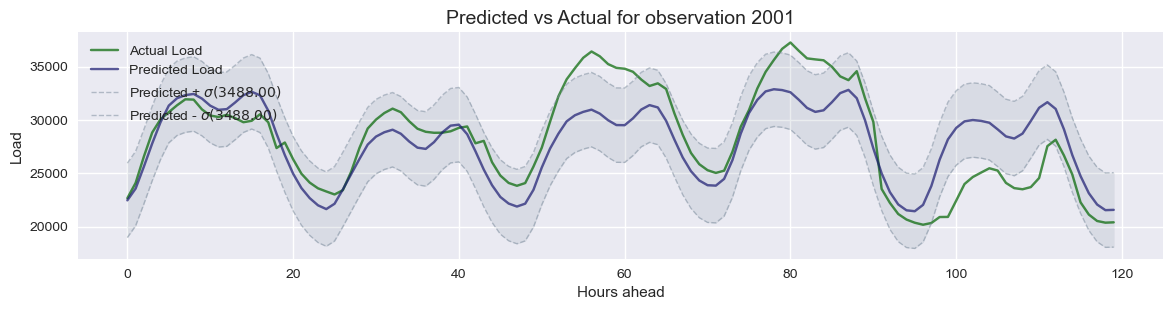

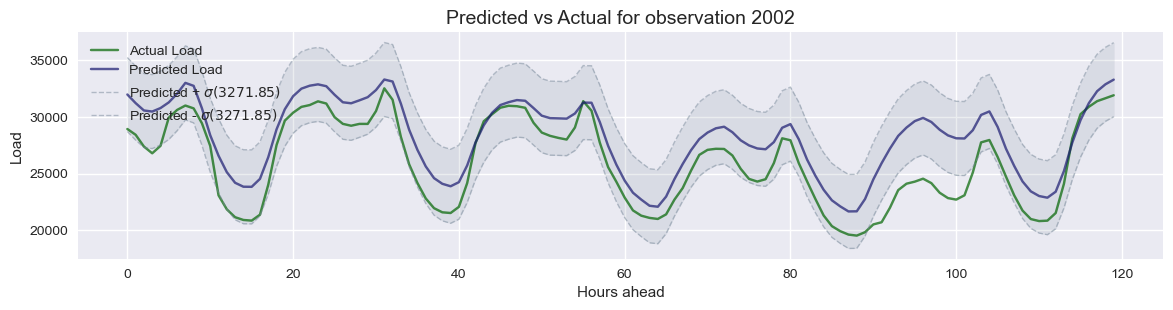

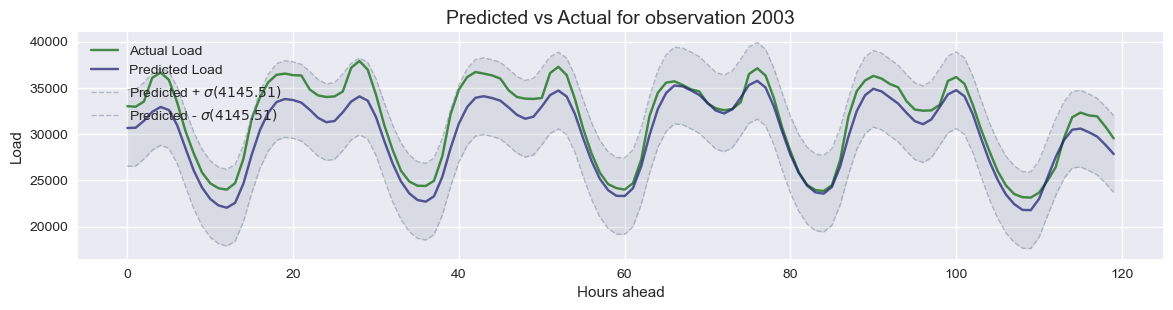

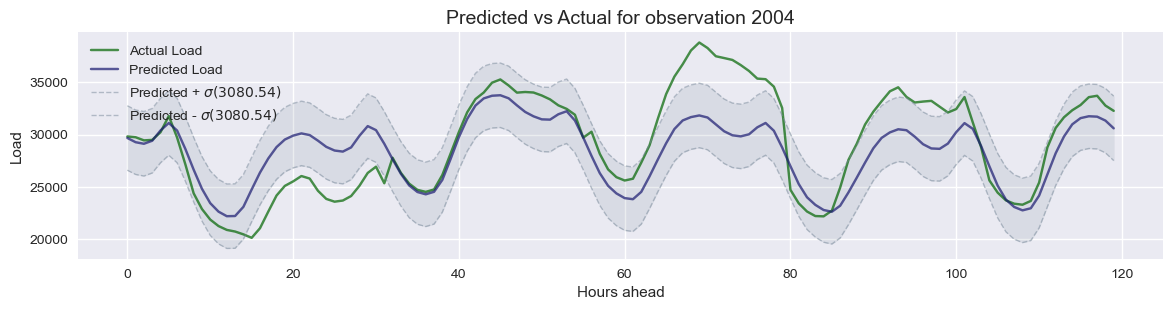

In [55]:
plot_actual_vs_prediction(load_prediction_ridge, load_target_test, variable_name = 'Load', start_inx = 2000, end_inx = 2005)
# beteen 0 and 5131 ----> count of observations in test_dataset

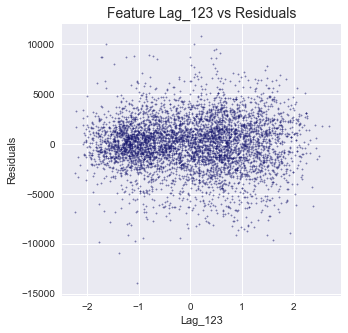

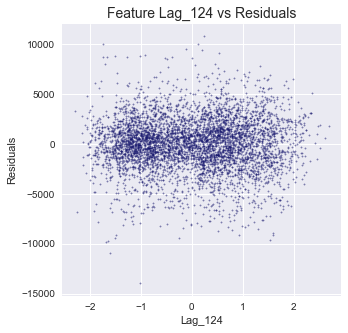

In [56]:
plot_feature_vs_residuals(load_atribute_test, load_attribute_col_names, 
                          load_prediction_ridge, load_target_test, start_index=200, stop_index=202, 
                          target_indx = 119, col_name = None) 

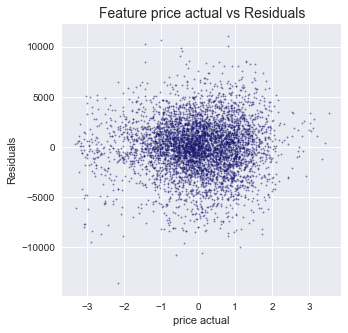

In [57]:
plot_feature_vs_residuals(load_atribute_test, load_attribute_col_names, 
                          load_prediction_ridge, load_target_test, start_index=155, stop_index=157, 
                          target_indx = 50, col_name = 'price actual') 

### Multi-Output Decision Tree Regression

Decision Tree е техника за контролирано обучение, която може да се използва както за проблеми с класификация, така и за регресия. Това е дървовидно структуриран класификатор, където вътрешните възли представляват характеристиките на набор от данни, клоновете представляват правилата за вземане на решения и всеки листов възел представлява резултата. Основно е предпочитана за задачи за класификация.<br>

Целева функция на Decision Tree се описва с: <br>
    
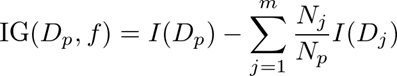

където
IG - Information gain
f- feature, по който се извършване на разделянето<br>
$D_p$, $D_j$  - набори от данни на родителските и дъщерните възли<br>
$N_p$, $N_j$ - размер на извадките (в родителски / дъщерни възли)<br>
I - impurity measure/index<br>

Има основно три __Impurity measures__:
- __Entropy__  - Можем интуитивно да представим горната формула като:
$$Information Gain= Entropy(Parent Decision Node)–(Average Entropy(Child Nodes))$$
Формално произволността в данните е известна като „Ентропия“, а разликата между „Ентропията“ преди и след разделянето е известна като „Придобиване на информация“(IG). Така става видно, че Дървото на решенията ще раздели данните, като използва функцията, която осигурява най-голяма печалба от информация.  
- __Gini index__ - подобна на Entropy.

- __Misclassification error__ - основното неудобство е, че е прекъсната в нулата.

Математически горните величини се изразяват по следния начин:

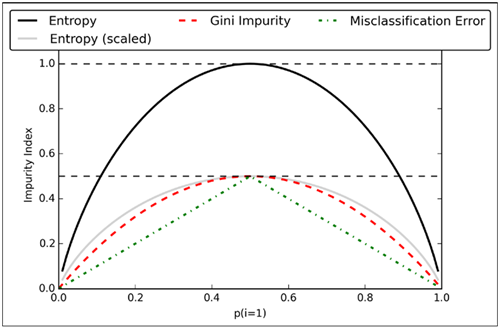


$$entropy = -p * np.log2(p) - (1 - p) * np.log2((1 - p))$$

$$gini\_index = p * (1 - p) + (1 - p) * (1 - (1 - p))$$

$$misclassification\_error = 1 - np.max([p, 1 - p])$$

където:
p e вероятността за клас 1 (0≤𝑝≤1) и е максимално за 𝑝 = 0,5

- При задачи за класификация Дървото на решенията обичайно използва критерии за избор „Entropy“ или „Gini“, за да раздели данните.
- В Sklearn критериите за избор при регресия обичайно са „mse“ и „mae“.

Дърветата са слаби регресори, но ще опитаме да ги приложим на нашите данни, тъй като са в основата на някой доста силни ансамблови алгоритми.

По долу са тествани различни варианти на оптимизация  на DecisionTreeRegressor върху всички данни, като всички те дават признаци на overfitting. Използването на DecisionTreeRegressor с редуцираните от РСА данни, не подобри значително overfitting-а. Резултатите са лоши.

In [82]:
load_decision_tree_regression = DecisionTreeRegressor().fit(load_atribute_train, load_target_train)

In [83]:
_, _, _ = evaluation_report(load_decision_tree_regression, load_atribute_train, load_target_train)

Score Results:
Mean squared error: 0.00
Root mean squared error: 0.00
Mean absolute error: 0.00
Coefficient of determination: 1.0000
Predicted mean: 28672.204 (4553.384)


In [84]:
_, _, _ = evaluation_report(load_decision_tree_regression, load_atribute_test, load_target_test)

Score Results:
Mean squared error: 12733333.65
Root mean squared error: 3568.02
Mean absolute error: 2540.21
Coefficient of determination: 0.3852
Predicted mean: 28699.989 (4568.214)


In [85]:
load_decision_tree_regression.decision_path(load_atribute_train[:100])

<100x58141 sparse matrix of type '<class 'numpy.int64'>'
	with 1826 stored elements in Compressed Sparse Row format>

In [86]:
(load_target_train["Target_1"]).to_numpy()

array([22503., 25066., 29378., ..., 20002., 33145., 21648.])

In [87]:
decision_tree =  DecisionTreeRegressor()
tuned_params = {
    "max_depth": [10, 15, 20, 50],
    "max_leaf_nodes": [500, 800, 1000, 1200],
}

cv = 3
load_decision_tree_regression = get_grid_search(decision_tree, tuned_params, cv, load_atribute_train, load_target_train )

DecisionTreeRegressor(max_depth=50, max_leaf_nodes=500)
Function took 1111.5376 seconds


In [90]:
save_model(load_decision_tree_regression, "#load_decision_tree_regression_mln.sav")

In [92]:
# load_decision_tree_regression = load_model("#load_decision_tree_regression_mln.sav")
# load_decision_tree_regression = load_decision_tree_regression.best_estimator_

In [88]:
_, _, _ = evaluation_report(load_decision_tree_regression, load_atribute_train, load_target_train)

Score Results:
Mean squared error: 7605690.76
Root mean squared error: 2757.57
Mean absolute error: 2069.13
Coefficient of determination: 0.6332
Predicted mean: 28672.204 (3623.205)


In [89]:
_, _, _ = evaluation_report(load_decision_tree_regression, load_atribute_test, load_target_test)

Score Results:
Mean squared error: 8890578.73
Root mean squared error: 2981.57
Mean absolute error: 2235.31
Coefficient of determination: 0.5708
Predicted mean: 28681.828 (3623.096)


### Multi-Output Decision Tree Regression with PCA data preprocessing

In [91]:
decision_tree_pca =  DecisionTreeRegressor()
tuned_params = {
    "max_depth": [5, 10, 15, 20, 30, 50],
    "max_leaf_nodes": [1000, 1200, 1500, 2000, 3000],
}

cv = 3
load_decision_tree_regression_pca = get_grid_search(decision_tree_pca, tuned_params, cv, PC_train, load_target_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=2000)
Function took 301.7654 seconds


In [92]:
save_model(load_decision_tree_regression_pca, "#load_decision_tree_regression_pca.sav")

In [93]:
load_decision_tree_regression_pca = load_model("#load_decision_tree_regression_pca.sav")
load_decision_tree_regression_pca = load_decision_tree_regression_pca.best_estimator_

In [94]:
_, _, _ = evaluation_report(load_decision_tree_regression_pca, PC_train, load_target_train)

Score Results:
Mean squared error: 6953224.61
Root mean squared error: 2636.54
Mean absolute error: 1974.49
Coefficient of determination: 0.6646
Predicted mean: 28672.204 (3712.153)


In [95]:
_, _, _ = evaluation_report(load_decision_tree_regression_pca, PC_test, load_target_test)

Score Results:
Mean squared error: 9101566.36
Root mean squared error: 3016.70
Mean absolute error: 2263.84
Coefficient of determination: 0.5606
Predicted mean: 28641.372 (3688.646)


In [96]:
load_decision_tree_regression_pca_proba = DecisionTreeRegressor(max_depth=15, max_leaf_nodes=800).fit(PC_train, load_target_train)

In [99]:
save_model(load_decision_tree_regression_pca_proba, "#load_decision_tree_regression_pca_optimal.sav")

In [110]:
load_decision_tree_regression_pca_proba = load_model("#load_decision_tree_regression_pca_optimal.sav")

In [97]:
_, _, _ = evaluation_report(load_decision_tree_regression_pca_proba, PC_train, load_target_train)

Score Results:
Mean squared error: 7047032.08
Root mean squared error: 2654.20
Mean absolute error: 1991.47
Coefficient of determination: 0.6601
Predicted mean: 28672.204 (3699.496)


In [98]:
_, _, _ = evaluation_report(load_decision_tree_regression_pca_proba, PC_test, load_target_test)

Score Results:
Mean squared error: 8926118.80
Root mean squared error: 2987.51
Mean absolute error: 2242.24
Coefficient of determination: 0.5691
Predicted mean: 28649.162 (3682.325)


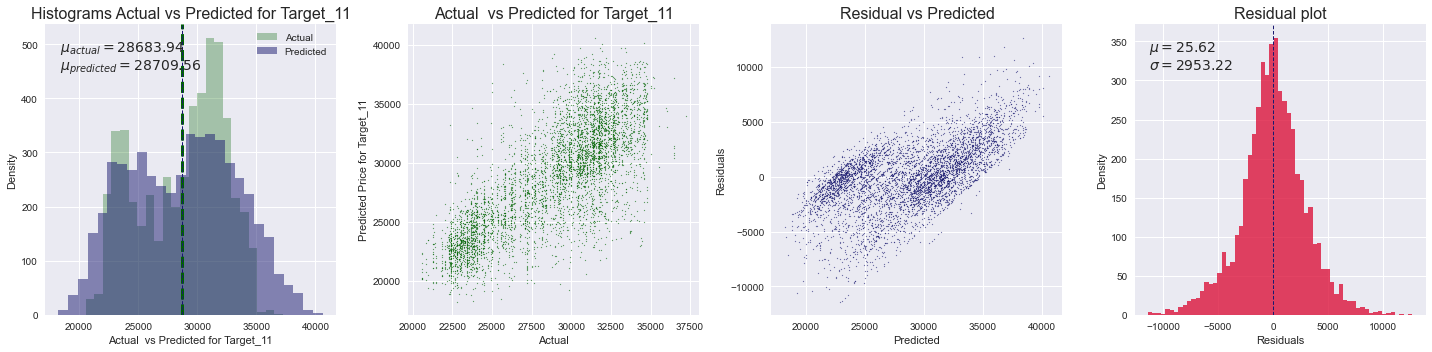

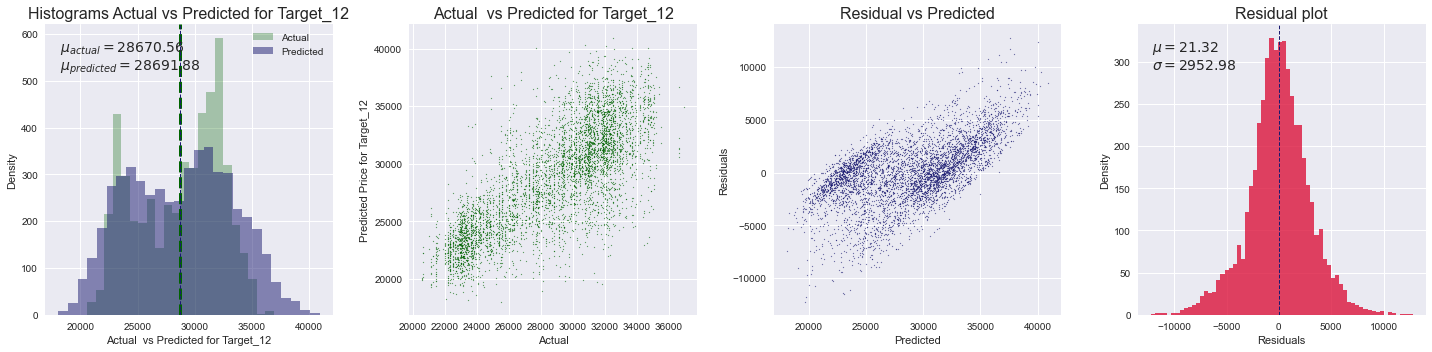

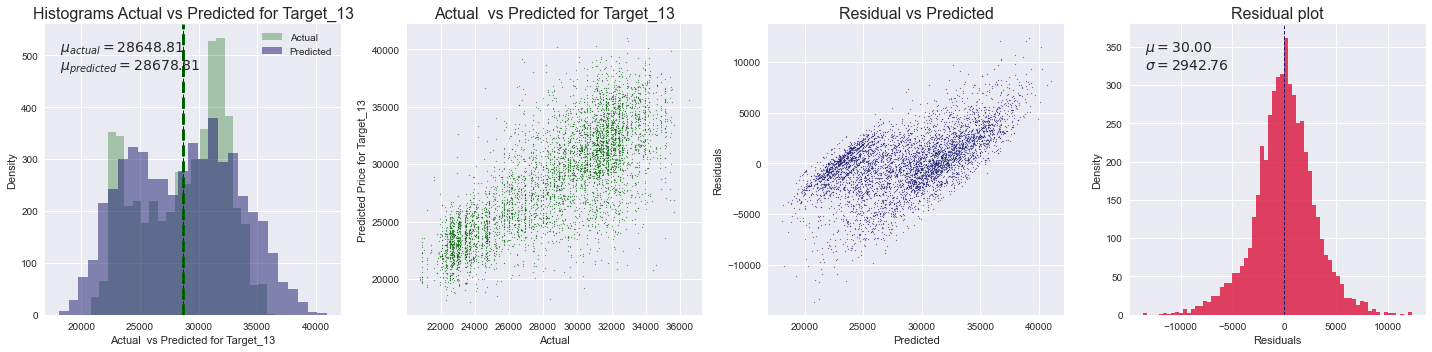

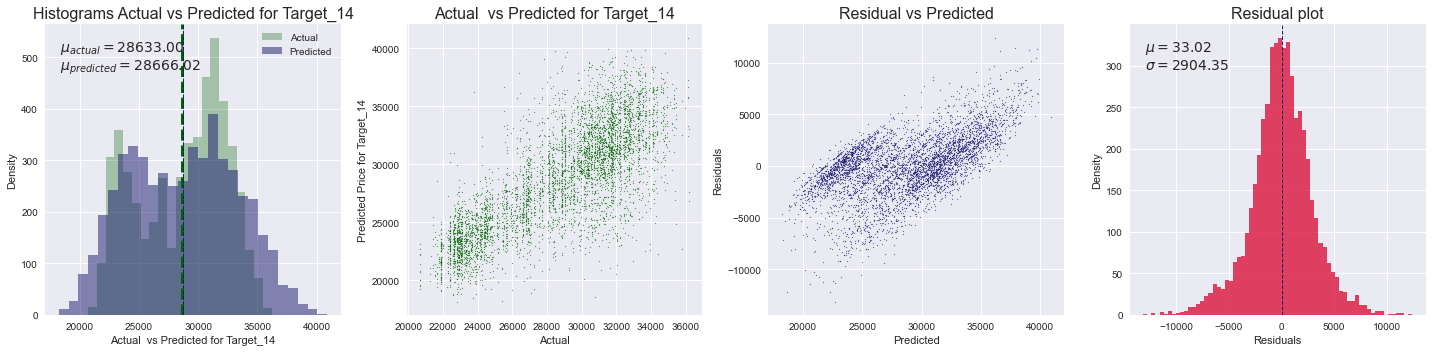

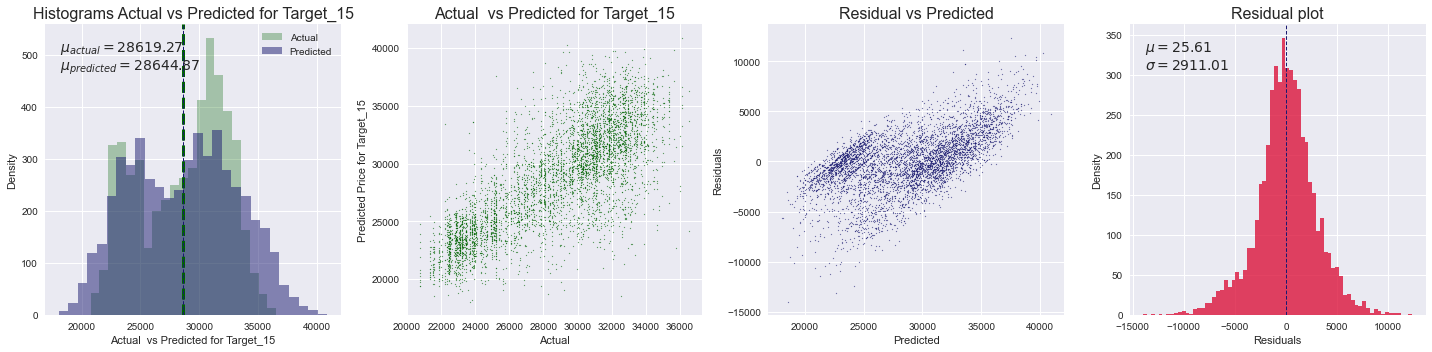

In [100]:
load_prediction_decision_tree_pca = load_decision_tree_regression_pca_proba.predict(PC_test)
e_minus_o = get_and_plot_data(load_prediction_decision_tree_pca, load_target_test, start_index=10, stop_index=15)

In [101]:
print(get_ttest (load_prediction_decision_tree_pca, load_target_test, idx=10))

p-value: 0.5344122123241231
we are accepting null hypothesis


In [102]:
print(get_ztest (load_prediction_decision_tree_pca, load_target_test, idx=10))

p-value: 0.534384605467156
accept null hypothesis


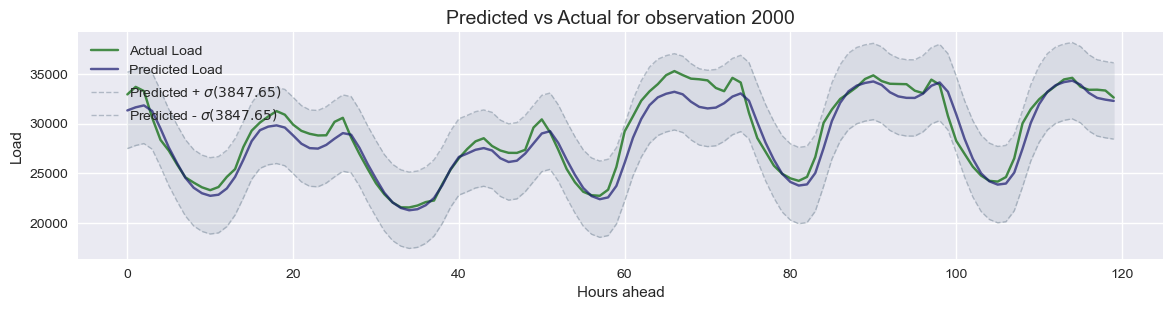

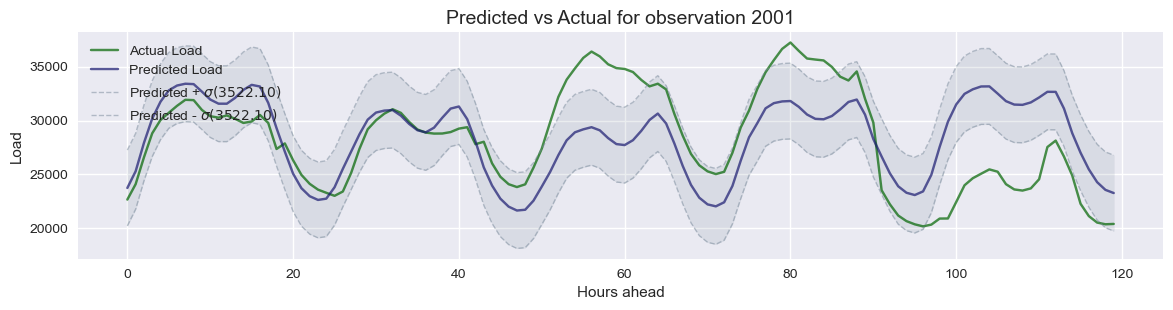

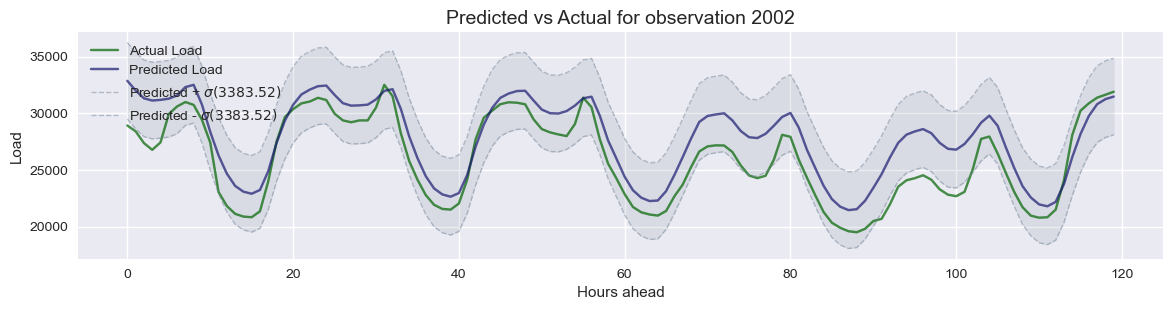

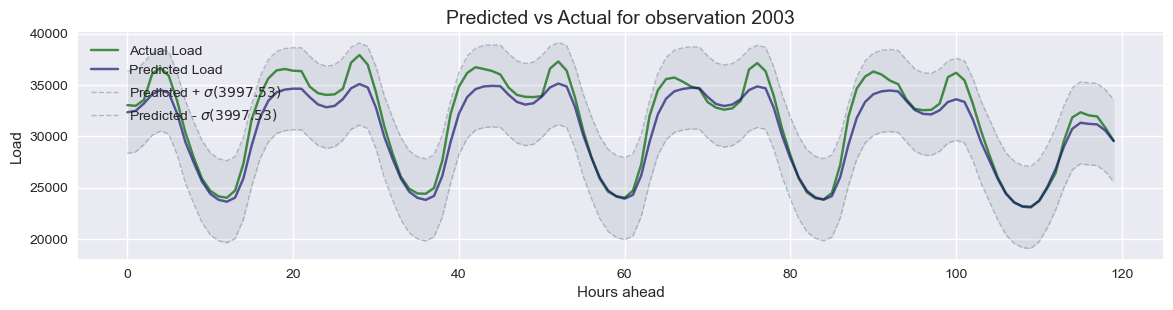

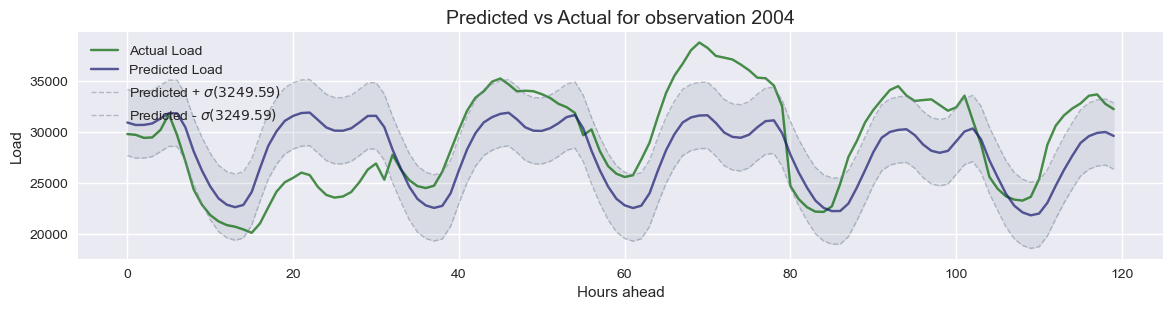

In [103]:
plot_actual_vs_prediction(load_prediction_decision_tree_pca, load_target_test, variable_name = 'Load', start_inx = 2000, end_inx = 2005)

In [104]:
load_decision_tree_regression_pca_proba.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': 800,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}